네이버 스포츠뉴스 워드클라우드

In [1]:
import time
import pandas as pd 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from urllib.parse import quote

In [4]:
sports = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
sub_url = '/news/index?isphoto=N&page='

In [5]:
driver=webdriver.Chrome()
url=f'{base_url}kbaseball{sub_url}1' #첫번째 페이지에서 가져오면 됨
driver.get(url)

In [8]:
#기사목록
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [10]:
#기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'한화 김태연, 17일 화촉 "시즌 준비 위해 신혼여행 미뤄...이해해준 아내에 감사"'

종목별로 몇페이지가 있는지 확인

In [11]:
url=f'{base_url}wfootball{sub_url}1'
driver.get(url)

In [14]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [16]:
sports_dict = {}
for sport in sports:
    url = f'{base_url}{sport}{sub_url}1'
    driver.get(url)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break

In [17]:
sports_dict

{'kbaseball': 7,
 'wbaseball': 10,
 'kfootball': 6,
 'wfootball': 15,
 'basketball': 5,
 'volleyball': 2,
 'golf': 4,
 'general': 11}

In [20]:
title = ''
for sport, num_pages in sports_dict.items():
    for page in range(1, num_pages + 1):
        url = f'{base_url}{sport}{sub_url}{page}'
        driver.get(url)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            title += li.select_one('.title').get_text().strip() + '\n'

In [21]:
title.count('\n')

1114

wordcloud 만들기

In [23]:
import re
import nltk
from konlpy.tag import Okt
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [24]:
okt=Okt()
tokens=okt.nouns(title) #명사만
tokens #잘 찍혔는지 10개만 뽑아오기

['이정후',
 '시간',
 '영광',
 '이정후',
 '작별',
 '인사',
 '삼성',
 '이부',
 '라이온스',
 '출신',
 '타자',
 '맥키논',
 '입',
 '오피',
 '셜',
 '한화',
 '김태연',
 '화촉',
 '시즌',
 '준비',
 '위해',
 '신혼여행',
 '이해',
 '아내',
 '감사',
 '선발',
 '공',
 '왼손',
 '엔스',
 '승',
 '포커스',
 '이정후',
 '작별',
 '인사',
 '항상',
 '기억',
 '응원',
 '행',
 '이정후',
 '작별',
 '인사',
 '전',
 '무대',
 '도전',
 '응원',
 '오지환',
 '서산',
 '학대',
 '피해',
 '아동',
 '터',
 '부금',
 '전달',
 '아버지',
 '로서',
 '보탬',
 '맨',
 '이정후',
 '기부',
 '계약',
 '시대',
 '선수',
 '시간',
 '영광',
 '입단',
 '이정후',
 '작별',
 '인사',
 '홍원기',
 '감독',
 '최주환',
 '루수',
 '건가',
 '명',
 '중',
 '무려',
 '명',
 '출신',
 '전격',
 '신임',
 '단장',
 '선임',
 '왜',
 '김재현',
 '단장',
 '한국',
 '시리즈',
 '오지환',
 '서산',
 '학대',
 '피해',
 '아동',
 '터',
 '성금',
 '전달',
 '오지환',
 '서산',
 '학대',
 '피해',
 '아동',
 '터',
 '기부',
 '프로야구',
 '샌프란시스코',
 '행',
 '이정후',
 '작별',
 '인사',
 '롯데',
 '어진',
 '전력',
 '분석',
 '코치',
 '김지수',
 '씨',
 '백년',
 '가약',
 '사나이',
 '훈련',
 '좌완',
 '특급',
 '꿈',
 '제구',
 '일',
 '김재현',
 '단장',
 '흥분',
 '책임감',
 '사이',
 '송성문',
 '혜림',
 '씨',
 '백년',
 '가약',
 '오지환',
 '박찬호',
 '김혜성',
 '유격수',
 '대전',
 '막',
 '두

In [25]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
    background_color='white', random_state= 2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(news.vocab().most_common(300)))

(-0.5, 399.5, 199.5, -0.5)

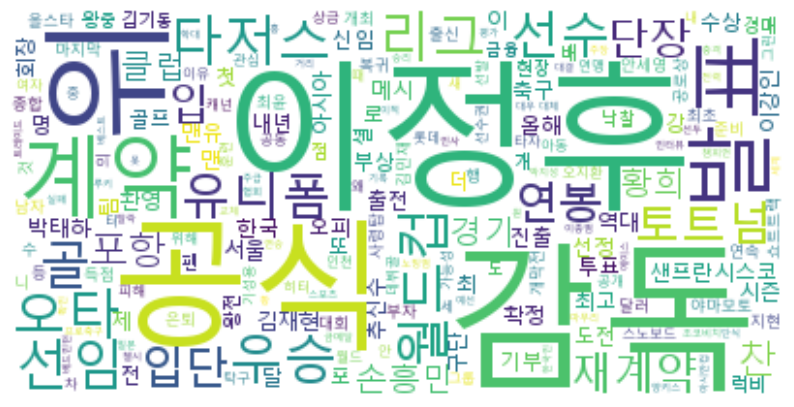

In [26]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')

In [27]:
mask = np.array(Image.open('ball.jpg'))
wc = WordCloud(
    background_color='white', random_state= 2023,
    font_path='c:/Windows/Fonts/malgun.ttf', mask=mask #mask=mask만 추가해주면 됨
).generate_from_frequencies(dict(news.vocab().most_common(300)))

(-0.5, 499.5, 499.5, -0.5)

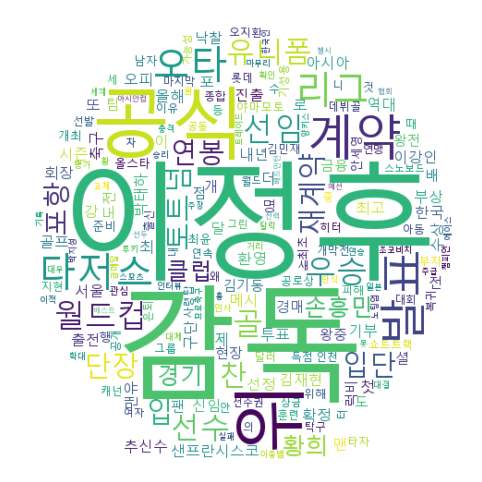

In [28]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

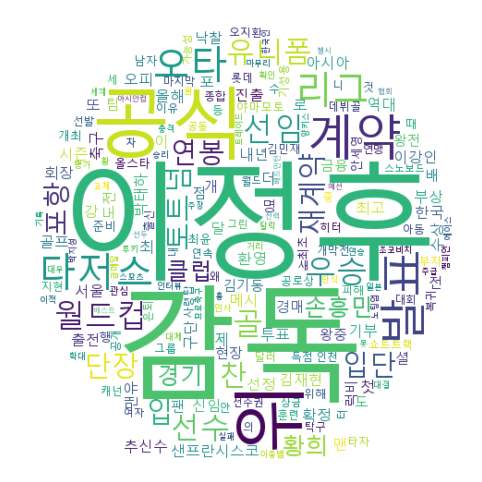

In [29]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')